<a href="https://colab.research.google.com/github/gtaiyeet/ML-assginment/blob/main/DS%26AI_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount the data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the data path
path_train='/content/drive/MyDrive/msc_training_dataset.csv'
path_test='/content/drive/MyDrive/msc_testing_dataset.csv'

In [ ]:
# Creat the data frame
import pandas as pd
train=pd.read_csv(path_train)
test=pd.read_csv(path_test)



In [ ]:
# import packages
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from math import sqrt

In [ ]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

In [ ]:
# Descrptive stastitics of the train data
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [ ]:
# Descrptive stastitics of the train data
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [ ]:
# Define the feature and target variable.
train_X = train.drop('price', axis=1)
test_X = test.drop('price', axis=1)
train_Y = train['price']
test_Y = test['price']

In [ ]:
train_X.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


In [ ]:
train_Y

0       6835
1       9005
2       9005
3       5105
4       9105
        ... 
2995    4825
2996    6755
2997    7565
2998    9135
2999    8955
Name: price, Length: 3000, dtype: int64

In [ ]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_Y)

In [ ]:
reg

LinearRegression()

In [ ]:
# use the linear regression model to predict price
predicted = reg.predict(test_X)

In [ ]:
predicted

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [ ]:
#Compare the Actual and Estimated value
predictions_df = pd.DataFrame({'Actual': test_Y, 'Predicted': predicted})

In [ ]:
# Adding a column to the DataFrame with the residual values
predictions_df['Residual'] = predictions_df['Actual'] - predictions_df['Predicted']

In [ ]:
predictions_df

,Actual,Predicted,Residual
0,5068,5055.0,13.0
1,7658,7645.0,13.0
2,11318,11305.0,13.0
3,8858,8845.0,13.0
4,11178,11165.0,13.0
...,...,...,...
994,10088,10075.0,13.0
995,9788,9775.0,13.0
996,9388,9375.0,13.0
997,8528,8515.0,13.0


In [ ]:
# Obtain R2 and MAE
print(reg.score(train_X, train_Y))
print(mean_absolute_error(test_Y, predicted))

1.0
13.000000000000469


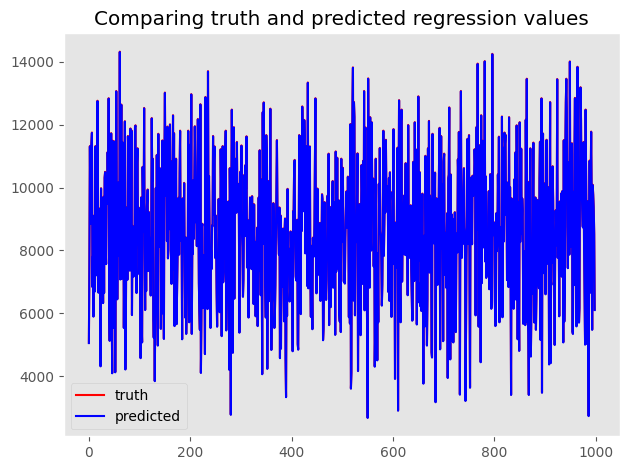

In [ ]:
# Display the predicted and actual data
make_plot(test_Y, predicted)

In [ ]:
# Random forest regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(train_X, train_Y)
rf_predicted = rf_reg.predict(test_X)
print(rf_reg.score(train_X, train_Y))
print(mean_absolute_error(test_Y, rf_predicted))


0.9984674802987114
170.76116116116117


In [ ]:
rf_predicted 

array([ 5307.6,  7728.3, 11414.6,  8782.4, 11099.9, 11483.3, 11734. ,
        6885.4,  7895.3,  5864.5,  9173.4,  8479. ,  7093.4, 11276.5,
        7367.8,  9491.7,  8981.4, 12745.3,  9838. ,  7062.2,  8853.4,
        7477. ,  7098.3,  4223.3, 10150.2,  7354.2,  7352.3,  9044.3,
        6824. ,  9268.7,  6619.6, 10035.3, 10542.4,  8250.7,  7740.1,
       10280.1,  9223.5, 11041.8,  9404.7, 13281.9,  6654.2,  5274.4,
        9902. ,  8916.6, 11617.9,  6132.6,  4365.4, 11443.3,  9546.2,
        5467.1, 11510.3, 10527.2,  4831.4,  7934.9, 13580.5,  9713.9,
        6139.2,  8407.8, 10146.9,  7815.7,  7878.6, 13509.8,  7270.5,
        8496.4, 12521.2,  7165.8, 11336.8, 10580. ,  9960.3,  5565.7,
        8168.5, 12101.6,  4211.2,  6238.6,  9619.6,  8704.3,  6933.9,
       11237.3, 10994.8, 10638. ,  8844.7,  7492.3, 12032.8,  8091.7,
       11697.9,  6218.5,  8730.7,  8310.2,  6881.4,  8317.6,  7628. ,
       12071.3, 11757.5,  7926.1,  6619.6, 11014.2, 11075.2,  8381.7,
        9164.6,  736

In [ ]:
#Compare the actual and predicted prices
rf_predictions_df = pd.DataFrame({'Actual': test_Y, 'Predicted': rf_predicted})

In [ ]:
# Adding a column to the DataFrame with the residual values
rf_predictions_df['Residual'] = rf_predictions_df['Actual'] - rf_predictions_df['Predicted']

In [ ]:
rf_predictions_df

,Actual,Predicted,Residual
0,5068,5365.4,-297.4
1,7658,7710.7,-52.7
2,11318,11439.4,-121.4
3,8858,8780.1,77.9
4,11178,11074.9,103.1
...,...,...,...
994,10088,9868.0,220.0
995,9788,9782.4,5.6
996,9388,8909.8,478.2
997,8528,8619.1,-91.1


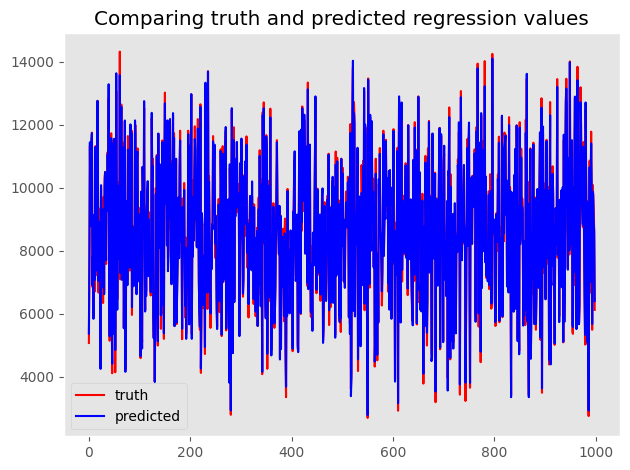

In [ ]:
make_plot(test_Y, rf_predicted)

room            0.431605
bathroom        0.004740
kitchen         0.011187
french_door     0.008736
backyard        0.014586
furnished       0.198551
green_paint     0.006803
solar_power     0.112861
woodfloor       0.175929
qlm_security    0.008912
club_access     0.026090
dtype: float64


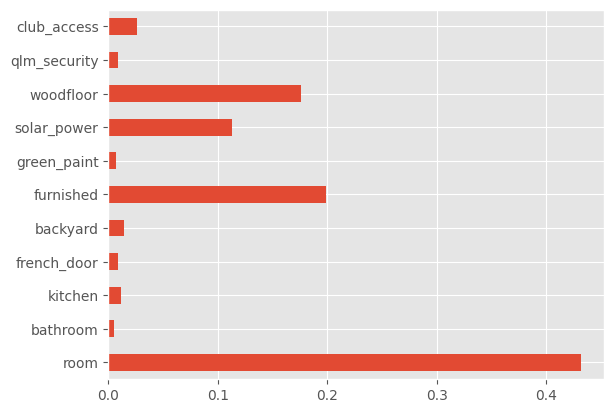

In [ ]:
# Obtain the important features in random forest
rf_importances = pd.Series(rf_reg.feature_importances_, index=train_X.columns)
print(rf_importances)
rf_importances.plot(kind='barh')
plt.show()

0.9471383275821861
471.3446303446304


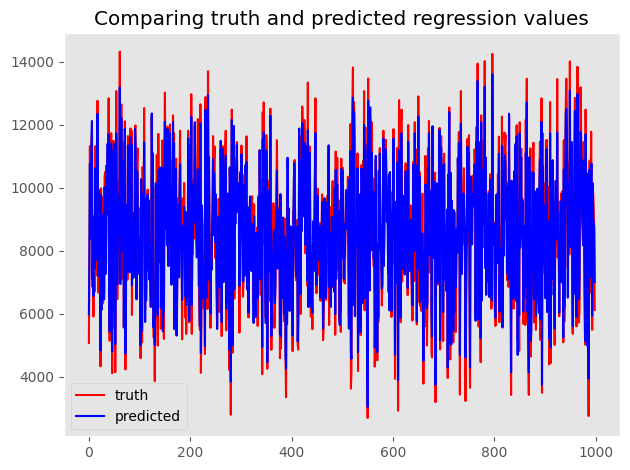

In [ ]:
 # import package for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(train_X, train_Y)
knn_predicted = neigh.predict(test_X)
print(neigh.score(train_X, train_Y))
print(mean_absolute_error(test_Y, knn_predicted))
make_plot(test_Y, knn_predicted)

In [ ]:
knn_predicted

array([ 5980.71428571,  7900.71428571, 10762.14285714,  8390.71428571,
       10556.42857143, 11162.14285714, 12116.42857143,  7096.42857143,
        7706.42857143,  6556.42857143,  9046.42857143,  7755.        ,
        7437.85714286, 10613.57142857,  7707.85714286,  8995.        ,
        8657.85714286, 12346.42857143,  9692.14285714,  7193.57142857,
        9917.85714286,  8105.        ,  7413.57142857,  4830.71428571,
        9769.28571429,  6119.28571429,  8193.57142857,  7463.57142857,
        6460.71428571,  9169.28571429,  6453.57142857, 10012.14285714,
        9477.85714286,  7257.85714286,  8440.71428571, 10712.14285714,
        9192.14285714, 11393.57142857,  9127.85714286, 11697.85714286,
        7166.42857143,  5425.        ,  9530.71428571,  8447.85714286,
       11412.14285714,  5682.14285714,  4789.28571429, 11156.42857143,
        9607.85714286,  6100.71428571, 11376.42857143, 10066.42857143,
        5019.28571429,  7587.85714286, 11717.85714286,  9175.        ,
      

In [ ]:
#Compare the actual and predicted prices
knn_predictions_df = pd.DataFrame({'Actual': test_Y, 'Predicted': knn_predicted})

In [ ]:
# Adding a column to the DataFrame with the residual values
knn_predictions_df['Residual'] = knn_predictions_df['Actual'] - knn_predictions_df['Predicted']

In [ ]:
knn_predictions_df

,Actual,Predicted,Residual
0,5068,5980.714286,-912.714286
1,7658,7900.714286,-242.714286
2,11318,10762.142857,555.857143
3,8858,8390.714286,467.285714
4,11178,10556.428571,621.571429
...,...,...,...
994,10088,10142.142857,-54.142857
995,9788,8993.571429,794.428571
996,9388,8923.571429,464.428571
997,8528,8753.571429,-225.571429


In [ ]:
 # import package for XGBRegressor 
import xgboost as xgb
xgb_reg =  xgb.XGBRegressor().fit(train_X, train_Y)
xgb_predicted = xgb_reg.predict(test_X)
print("R-sqaured:", xgb_reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, xgb_predicted))
xgb_importances = xgb_reg.feature_importances_
xgb_ranks_and_features = zip(xgb_importances, rf_reg.feature_names_in_)
xgb_ranks_and_features = sorted(xgb_ranks_and_features,reverse=True)
print("\nFeature Importances with XGBoost:")
for x, y in xgb_ranks_and_features:
    print(x, y)


R-sqaured: 0.9997084329328167
Mean Absolute Error: 60.142959121230604

Feature Importances with XGBoost:
0.29977584 room
0.241706 woodfloor
0.2364698 furnished
0.11214046 solar_power
0.026595302 club_access
0.019723801 backyard
0.01696462 qlm_security
0.014970071 kitchen
0.011910282 french_door
0.011131189 green_paint
0.0086126365 bathroom


In [ ]:
#Compare the Actual and Estimated value
xgb_predictions_df = pd.DataFrame({'Actual': test_Y, 'Predicted': xgb_predicted})

In [ ]:
# Adding a column to the DataFrame with the residual values
xgb_predictions_df['Residual'] = xgb_predictions_df['Actual'] - xgb_predictions_df['Predicted']

In [ ]:
xgb_predictions_df

,Actual,Predicted,Residual
0,5068,5148.416016,-80.416016
1,7658,7656.704590,1.295410
2,11318,11278.064453,39.935547
3,8858,8745.116211,112.883789
4,11178,11127.098633,50.901367
...,...,...,...
994,10088,9970.373047,117.626953
995,9788,9773.116211,14.883789
996,9388,9389.592773,-1.592773
997,8528,8573.990234,-45.990234


room            0.299776
bathroom        0.008613
kitchen         0.014970
french_door     0.011910
backyard        0.019724
furnished       0.236470
green_paint     0.011131
solar_power     0.112140
woodfloor       0.241706
qlm_security    0.016965
club_access     0.026595
dtype: float32


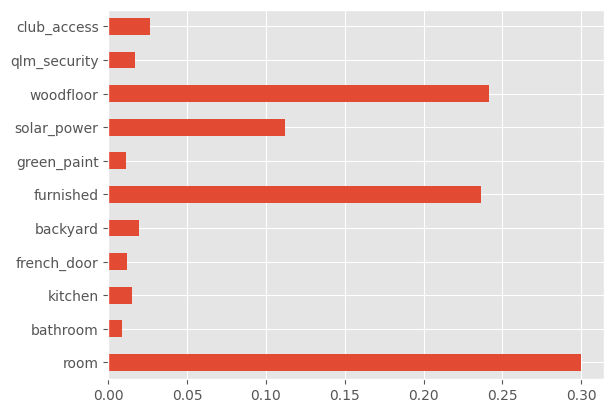

In [ ]:
xgb_importances = pd.Series(xgb_reg.feature_importances_, index=train_X.columns)
print(xgb_importances)
xgb_importances.plot(kind='barh')
plt.show()

In [ ]:
xgb_predicted

array([ 5148.416 ,  7656.7046, 11278.064 ,  8745.116 , 11127.099 ,
       11222.3955, 11739.574 ,  6848.711 ,  7767.5234,  5909.1157,
        9033.005 ,  8422.511 ,  6652.882 , 11309.728 ,  7162.8477,
        9100.832 ,  8863.883 , 12851.478 ,  9680.847 ,  6732.82  ,
        9311.709 ,  7718.399 ,  7035.023 ,  4374.608 ,  9984.954 ,
        6940.473 ,  7280.7275,  8873.837 ,  6341.4707,  9618.7705,
        6653.249 , 10322.769 , 10497.256 ,  8144.93  ,  7646.1826,
       10347.003 ,  9462.381 , 11102.428 ,  9790.52  , 12912.751 ,
        6383.6855,  5167.9097,  9914.373 ,  8879.723 , 11695.252 ,
        6201.2173,  4218.778 , 11469.141 ,  9645.313 ,  5652.9897,
       11424.627 , 10264.246 ,  4340.5767,  7817.545 , 12937.625 ,
        9641.915 ,  6529.354 ,  8377.5205, 10059.843 ,  7821.1494,
        8286.929 , 14146.023 ,  7092.825 ,  8442.184 , 12650.5205,
        6948.8447, 11425.142 , 10575.425 , 10027.336 ,  5470.0005,
        8214.382 , 12130.265 ,  4323.3804,  5942.8584,  9350.5

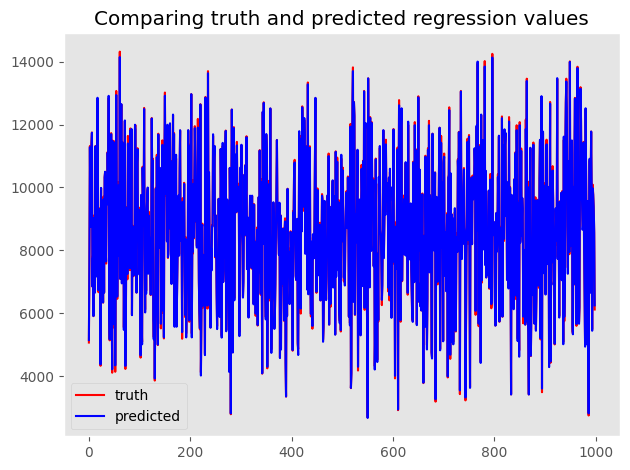

In [ ]:
make_plot(test_Y, xgb_predicted)

Text(0.5, 1.0, 'MAE for various regression algorithms')

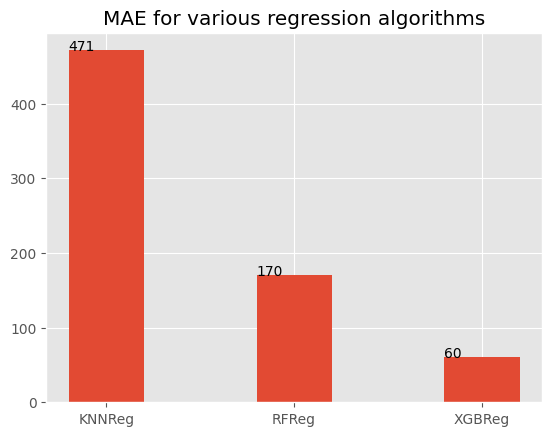

In [ ]:
# plot the mean absolute error of all the algorithms
knn_mae = mean_absolute_error(test_Y, knn_predicted)
rf_mae = mean_absolute_error(test_Y, rf_predicted)
xgb_mae = mean_absolute_error(test_Y, xgb_predicted)
errors = [ knn_mae, rf_mae, xgb_mae]
labels = [ "KNNReg", "RFReg", "XGBReg"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
yval = int(bar.get_height())
plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for various regression algorithms")

                     0
room          0.431605
bathroom      0.004740
kitchen       0.011187
french_door   0.008736
backyard      0.014586
furnished     0.198551
green_paint   0.006803
solar_power   0.112861
woodfloor     0.175929
qlm_security  0.008912
club_access   0.026090


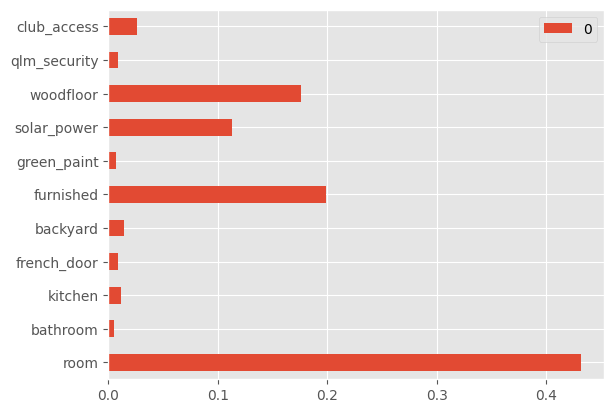

In [ ]:
rf_importances = pd.DataFrame(rf_reg.feature_importances_, index=train_X.columns)
print(rf_importances)
rf_importances.plot(kind='barh')
plt.show()